# Clustering with scikit-learn
We will use K-means for unsupervised learning on digits datasets

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits= load_digits()
digits_x= digits.data
digits_y= digits.target
print('digits x shape ', digits_x.shape)
print('digits y  shape ', digits_y.shape)

sample_digit= digits_x[0]
print('first handwritten data digit: ', sample_digit)
print('first handwritten data digit shape: ', sample_digit.shape)

digits x shape {} (1797, 64)
digits y  shape {} (1797,)
first handwritten data digit: {} [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
first handwritten data digit shape: {} (64,)


In [17]:
print("sample digit", digits_x)

sample digit [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


image after reshaping:  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


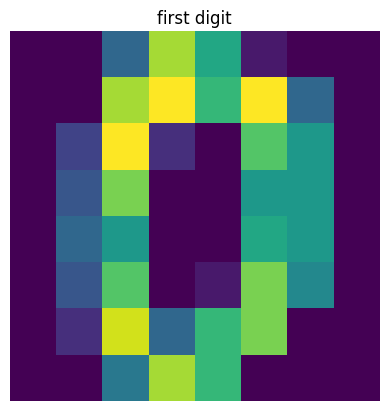

In [16]:
sample_digit=sample_digit.reshape(8,8)
print("image after reshaping: ", sample_digit)
plt.imshow(sample_digit)
plt.title('first digit')
plt.axis('off')
plt.show()

In [ ]:

digits_df= pd.DataFrame(digits_x, columns=[ f'feature_{i}' for i in range(digits_x.shape[1])])

digits_df.describe()

In [11]:
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1797 non-null   float64
 1   feature_1   1797 non-null   float64
 2   feature_2   1797 non-null   float64
 3   feature_3   1797 non-null   float64
 4   feature_4   1797 non-null   float64
 5   feature_5   1797 non-null   float64
 6   feature_6   1797 non-null   float64
 7   feature_7   1797 non-null   float64
 8   feature_8   1797 non-null   float64
 9   feature_9   1797 non-null   float64
 10  feature_10  1797 non-null   float64
 11  feature_11  1797 non-null   float64
 12  feature_12  1797 non-null   float64
 13  feature_13  1797 non-null   float64
 14  feature_14  1797 non-null   float64
 15  feature_15  1797 non-null   float64
 16  feature_16  1797 non-null   float64
 17  feature_17  1797 non-null   float64
 18  feature_18  1797 non-null   float64
 19  feature_19  1797 non-null  

In [17]:
print(digits.images)
print(digits.images.shape)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

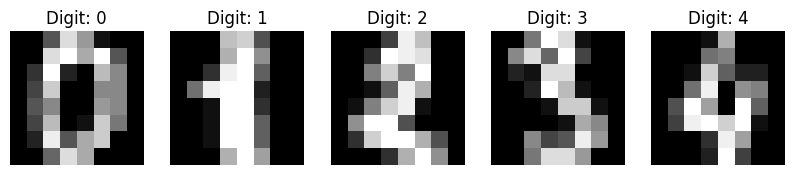

In [18]:
fig, axes= plt.subplots(1,5, figsize=(10,3))

for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.show()

# K means clustering 


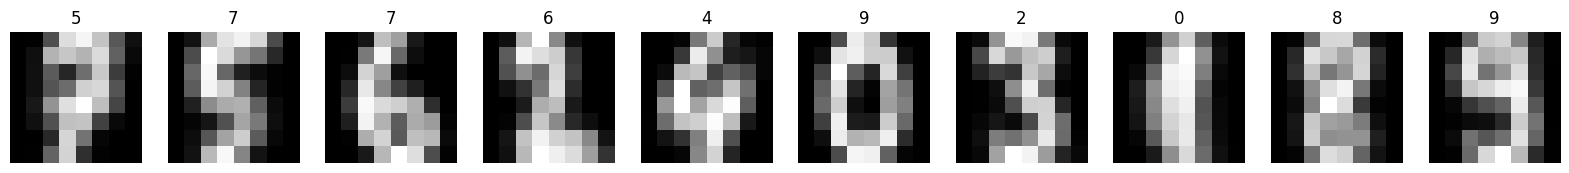

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import normalized_mutual_info_score

kmeans= KMeans(n_clusters=10, random_state=42)
kmeans.fit(digits_x)

fig, axes= plt.subplots(1,10,figsize=(20,5))

for i,ax in enumerate(axes):
    center_image= kmeans.cluster_centers_[i].reshape(8,8)
    ax.imshow(center_image, cmap='gray')
    ax.set_title(kmeans.labels_[i]) 
    ax.axis('off')
plt.show()


In [23]:
print("normalized mutual info score",normalized_mutual_info_score(digits_y, kmeans.labels_))

normalized mutual info score 0.7749970862895714
